In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('bitcoinfinal+(4).csv', header = None)
data.head()

,0,1
0,0,217.4
1,1,255.7
2,2,244.3
3,3,236.1
4,4,228.7


In [4]:
data.columns = ['Month','Price']
#data['Month'] = pd.to_datetime(data['Month'], format='%b')
data = data.set_index('Month')
data.head()

,Price
Month,
0,217.4
1,255.7
2,244.3
3,236.1
4,228.7


In [5]:
data.shape

(32, 1)

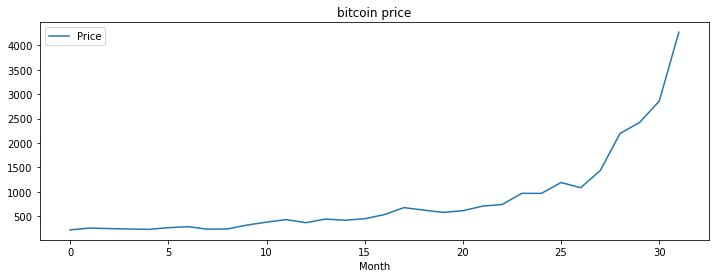

In [6]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('bitcoin price')
plt.show(block=False)

In [7]:
data.isna().sum()

Price    0
dtype: int64

In [8]:
train_len = 29
train = data[0:train_len] 
test = data[train_len:] 

In [9]:
train.shape

(29, 1)

In [10]:
test.shape

(3, 1)

In [12]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Price'][train_len-1]
y_hat_naive.head()

,Price,naive_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


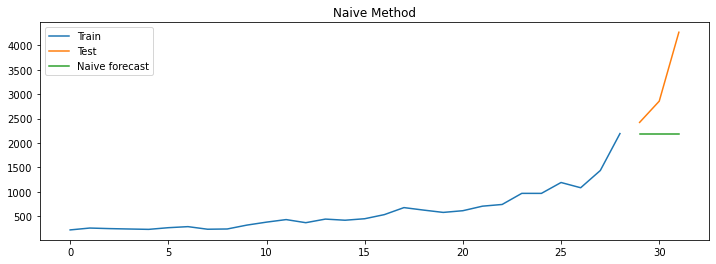

In [18]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_naive['naive_forecast'])/test['Price'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.9,27.12


In [15]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Price'].mean()
y_hat_avg.head()

,Price,avg_forecast
Month,,
29,2420.7,595.751724
30,2856.0,595.751724
31,4268.8,595.751724


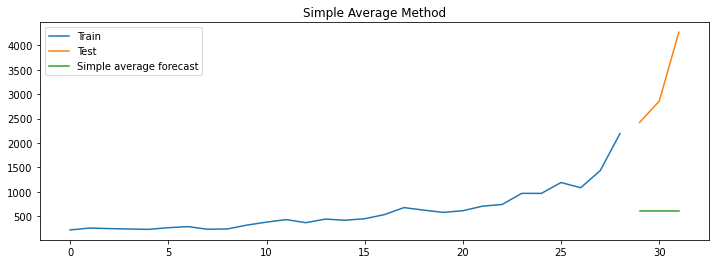

In [19]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_avg['avg_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19


In [21]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
y_hat_sma[25:]

,Price,sma_forecast
Month,,
25,1189.1,703.666667
26,1081.7,759.141667
27,1435.2,841.525000
28,2191.8,979.950000
29,2420.7,979.950000
30,2856.0,979.950000
31,4268.8,979.950000


In [22]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast 12'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42


In [23]:
y_hat_sma = data.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
y_hat_sma[25:]

,Price,sma_forecast
Month,,
25,1189.1,862.683333
26,1081.7,941.116667
27,1435.2,1062.966667
28,2191.8,1305.100000
29,2420.7,1305.100000
30,2856.0,1305.100000
31,4268.8,1305.100000


In [24]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast 6'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61


In [25]:
y_hat_sma = data.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = data['Price'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]
y_hat_sma[25:]

,Price,sma_forecast
Month,,
25,1189.1,1040.633333
26,1081.7,1079.000000
27,1435.2,1235.333333
28,2191.8,1569.566667
29,2420.7,1569.566667
30,2856.0,1569.566667
31,4268.8,1569.566667


In [26]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_sma['sma_forecast'][train_len:])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast 3'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81


In [32]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(smoothing_level=0.9,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))
y_hat_ses

,Price,ses_forecast
Month,,
29,2420.7,2112.689882
30,2856.0,2112.689882
31,4268.8,2112.689882


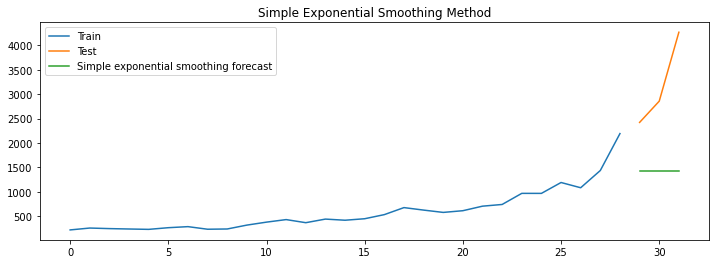

In [30]:
plt.figure(figsize=(12,4))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast 0.9'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75


In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(smoothing_level=0.5,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))
y_hat_ses

,Price,ses_forecast
Month,,
29,2420.7,1720.394581
30,2856.0,1720.394581
31,4268.8,1720.394581


In [35]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast 0.5'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75
0,Simple exponential smoothing forecast 0.5,1660.76,42.80


In [36]:
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(smoothing_level=1,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))
y_hat_ses

,Price,ses_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


In [37]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast 1'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75
0,Simple exponential smoothing forecast 0.5,1660.76,42.80
0,Simple exponential smoothing forecast 1,1265.90,27.12


In [38]:
model = SimpleExpSmoothing(train['Price'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))
y_hat_ses

,Price,ses_forecast
Month,,
29,2420.7,2191.8
30,2856.0,2191.8
31,4268.8,2191.8


In [39]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_ses['ses_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast Optimized'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75
0,Simple exponential smoothing forecast 0.5,1660.76,42.80
0,Simple exponential smoothing forecast 1,1265.90,27.12
0,Simple exponential smoothing forecast Optimized,1265.90,27.12


In [40]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 1.0, 'smoothing_slope': 0.42166539635506756, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 203.68560741437514, 'initial_slope': 13.713103966422747, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


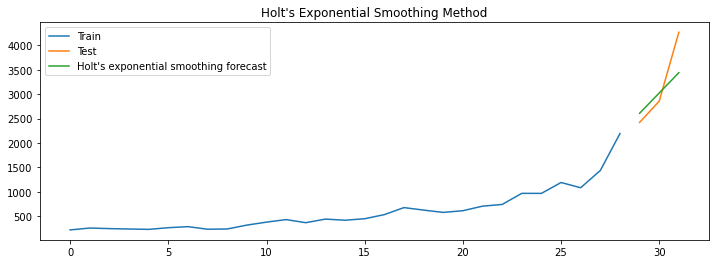

In [41]:
plt.figure(figsize=(12,4))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [42]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_holt['holt_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75
0,Simple exponential smoothing forecast 0.5,1660.76,42.80
0,Simple exponential smoothing forecast 1,1265.90,27.12
0,Simple exponential smoothing forecast Optimized,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01


In [43]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=3 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))
y_hat_hwa

{'smoothing_level': 0.9999, 'smoothing_slope': 0.42105263157894735, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 559.53, 'initial_slope': 1.1444444444444395, 'initial_seasons': array([-342.13, -303.83, -315.23]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Price,hw_forecast
Month,,
29,2420.7,2586.092856
30,2856.0,2964.903156
31,4268.8,3408.838624


In [44]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwa['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75
0,Simple exponential smoothing forecast 0.5,1660.76,42.80
0,Simple exponential smoothing forecast 1,1265.90,27.12
0,Simple exponential smoothing forecast Optimized,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01


In [45]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))
y_hat_hwm

{'smoothing_level': 0.6315789468947434, 'smoothing_slope': 0.6315789468947434, 'smoothing_seasonal': 0.3684210521579012, 'damping_slope': nan, 'initial_level': 516.3666344067656, 'initial_slope': 26.208353807322048, 'initial_seasons': array([0.41926293, 0.42288633, 0.35235471, 0.50871513, 0.60851277,
       0.53621642, 0.55811655, 0.5176285 , 0.49785213, 0.56454369,
       0.66716345, 0.81680178]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


,Price,hw_forecast
Month,,
29,2420.7,3134.420177
30,2856.0,3379.758186
31,4268.8,3292.425694


In [46]:
rmse = np.sqrt(mean_squared_error(test['Price'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Price']-y_hat_hwm['hw_forecast'])/test['Price'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,1265.90,27.12
0,Simple average method,2703.73,80.19
0,Simple moving average forecast 12,2338.94,67.42
0,Simple moving average forecast 6,2035.79,56.61
0,Simple moving average forecast 3,1794.92,47.81
0,Simple exponential smoothing forecast 0.9,1328.68,29.75
0,Simple exponential smoothing forecast 0.5,1660.76,42.80
0,Simple exponential smoothing forecast 1,1265.90,27.12
0,Simple exponential smoothing forecast Optimized,1265.90,27.12
0,Holt's exponential smoothing method,500.11,11.01
